### 1. Response Time ms (latency)

/tmp/ipykernel_7822/733581153.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


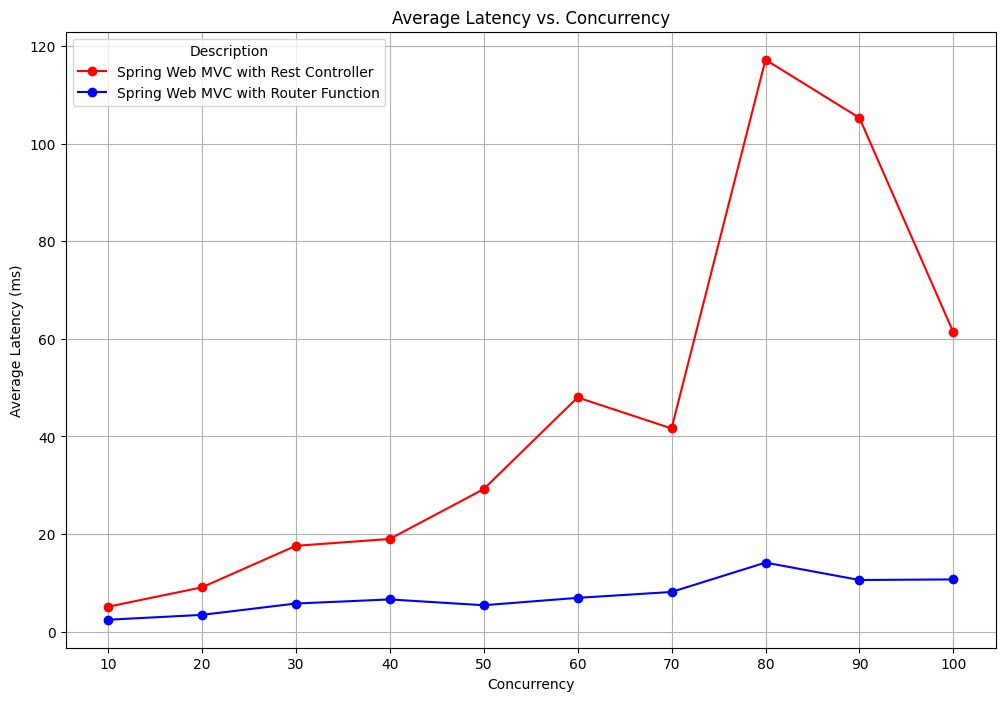

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'results/results_2024-07-09_23:50:00_rest_controller_vs_router_function.log'
df = pd.read_csv(file_path, sep=',')

df_filtered = df[df['description'].isin(
    [
     'Spring Web MVC with Rest Controller',
     'Spring Web MVC with Router Function'
     ])][['description', 'concurrency', 'lat_avg']]

grouped_data = df_filtered.groupby(['description', 'concurrency'])['lat_avg'].mean().reset_index()


# grouped_data.to_csv('test_csv/output1.csv', index=False)

# Plot setup
plt.figure(figsize=(12, 8))

# Colors for each description
colors = {
    'Spring Web MVC with Rest Controller': 'red',
    'Spring Web MVC with Router Function': 'blue'
}

# Plot each group
for description, color in colors.items():
    subset = grouped_data[grouped_data['description'] == description]
    plt.plot(subset['concurrency'], subset['lat_avg'], marker='o', label=description, color=color)

# Customize the plot
plt.title('Average Latency vs. Concurrency')
plt.xlabel('Concurrency')
plt.ylabel('Average Latency (ms)')
plt.legend(title='Description')
plt.xticks([10,20,30,40,50,60,70,80,90,100])
plt.grid(True)

# Show the plot
plt.show()

### 2. Grapgh - Number of Requests

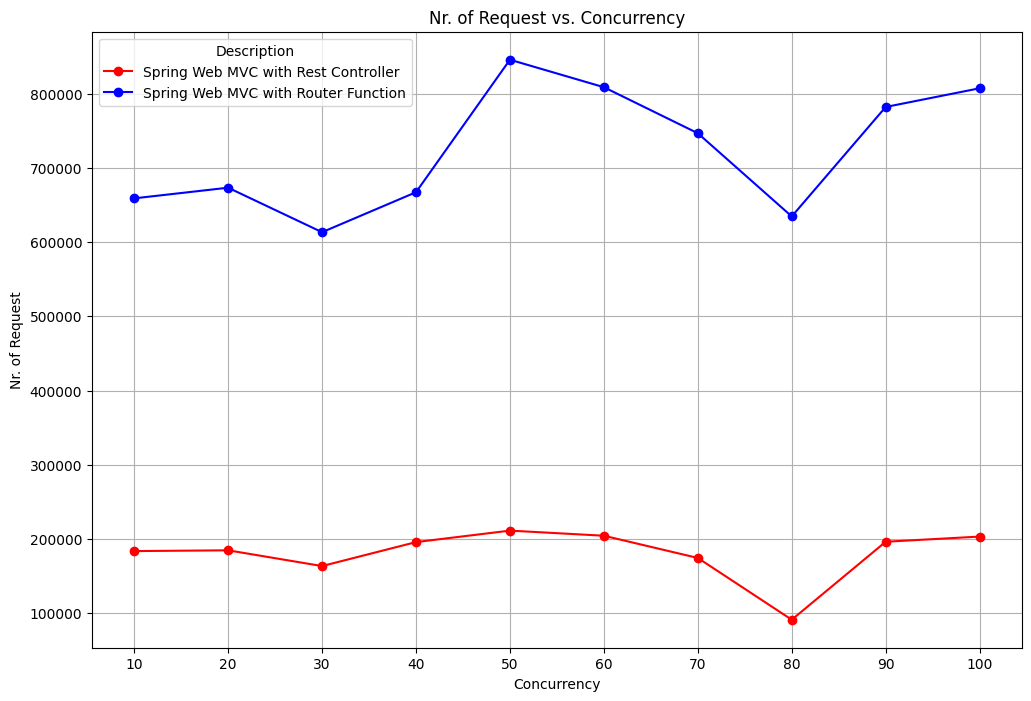

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'results/results_2024-07-09_23:50:00_rest_controller_vs_router_function.log'
df = pd.read_csv(file_path)

df_filtered = df[df['description'].isin(
    [
     'Spring Web MVC with Rest Controller',
     'Spring Web MVC with Router Function'
     ])][['description', 'concurrency', 'tot_requests']]

grouped_data = df_filtered.groupby(['description', 'concurrency'])['tot_requests'].mean().reset_index()


# grouped_data.to_csv('test_csv/output1.csv', index=False)

# Plot setup
plt.figure(figsize=(12, 8))

# Colors for each description
colors = {
    'Spring Web MVC with Rest Controller': 'red',
    'Spring Web MVC with Router Function': 'blue'
}

# Plot each group
for description, color in colors.items():
    subset = grouped_data[grouped_data['description'] == description]
    plt.plot(subset['concurrency'], subset['tot_requests'], marker='o', label=description, color=color)

# Customize the plot
plt.title('Nr. of Request vs. Concurrency')
plt.xlabel('Concurrency')
plt.ylabel('Nr. of Request')
plt.legend(title='Description')
plt.xticks([10,20,30,40,50,60,70,80,90,100])
plt.grid(True)

# Show the plot
plt.show()

### 3. Memory usage

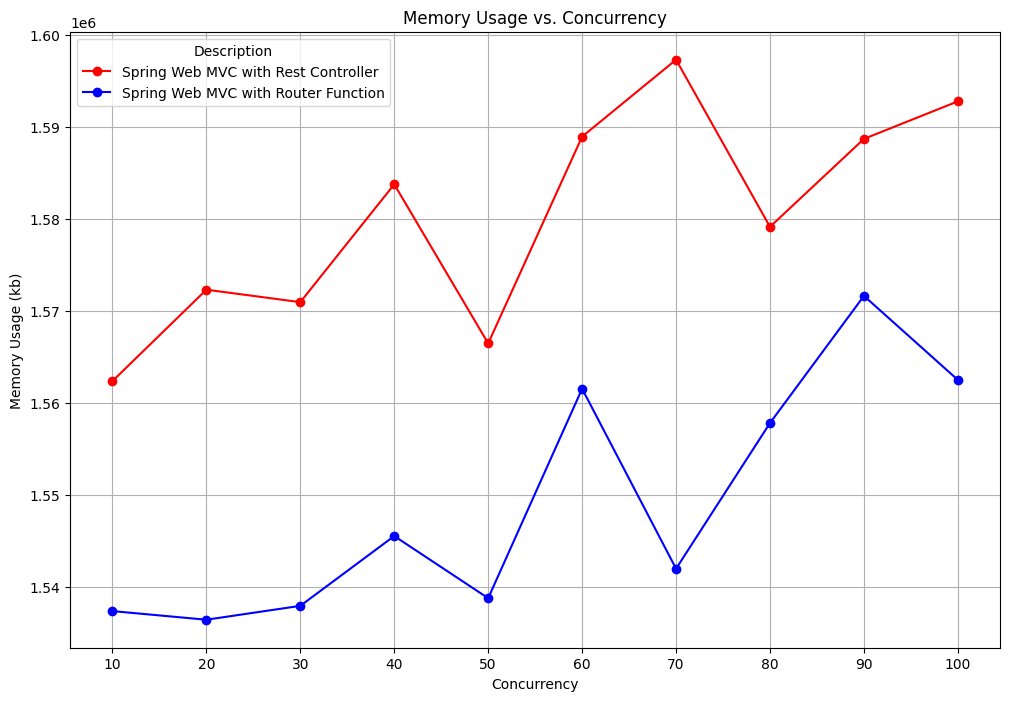

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'results/results_2024-07-09_23:50:00_rest_controller_vs_router_function.log'
df = pd.read_csv(file_path)

df_filtered = df[df['description'].isin(
    [
     'Spring Web MVC with Rest Controller',
     'Spring Web MVC with Router Function'
     ])][['description', 'concurrency', 'mem_kb_uss']]

grouped_data = df_filtered.groupby(['description', 'concurrency'])['mem_kb_uss'].mean().reset_index()


# grouped_data.to_csv('test_csv/output1.csv', index=False)

# Plot setup
plt.figure(figsize=(12, 8))

# Colors for each description
colors = {
    'Spring Web MVC with Rest Controller': 'red',
    'Spring Web MVC with Router Function': 'blue'
}

# Plot each group
for description, color in colors.items():
    subset = grouped_data[grouped_data['description'] == description]
    plt.plot(subset['concurrency'], subset['mem_kb_uss'], marker='o', label=description, color=color)

# Customize the plot
plt.title('Memory Usage vs. Concurrency')
plt.xlabel('Concurrency')
plt.ylabel('Memory Usage (kb)')
plt.legend(title='Description')
plt.xticks([10,20,30,40,50,60,70,80,90,100])
plt.grid(True)

# Show the plot
plt.show()

### 3.1. Memory usage per request

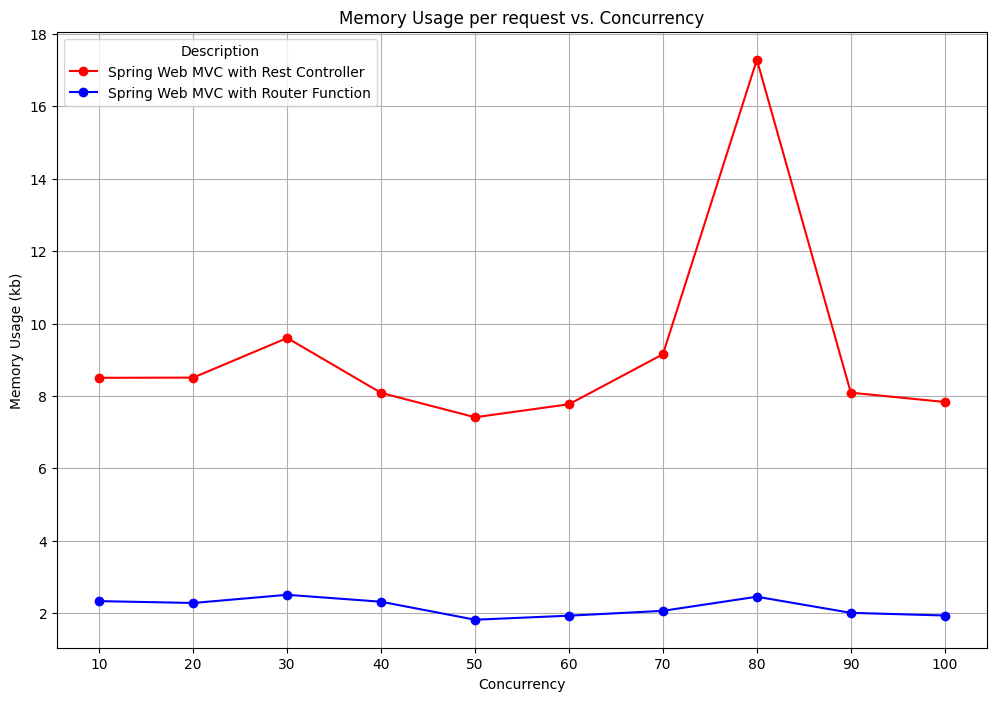

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'results/results_2024-07-09_23:50:00_rest_controller_vs_router_function.log'
df = pd.read_csv(file_path)

df['memory_per_request']=df['mem_kb_uss']/df['tot_requests']

df_filtered = df[df['description'].isin(
    [
     'Spring Web MVC with Rest Controller',
     'Spring Web MVC with Router Function'
     ])][['description', 'concurrency', 'memory_per_request']]

grouped_data = df_filtered.groupby(['description', 'concurrency'])['memory_per_request'].mean().reset_index()


# grouped_data.to_csv('test_csv/output1.csv', index=False)

# Plot setup
plt.figure(figsize=(12, 8))

# Colors for each description
colors = {
    'Spring Web MVC with Rest Controller': 'red',
    'Spring Web MVC with Router Function': 'blue'
}

# Plot each group
for description, color in colors.items():
    subset = grouped_data[grouped_data['description'] == description]
    plt.plot(subset['concurrency'], subset['memory_per_request'], marker='o', label=description, color=color)

# Customize the plot
plt.title('Memory Usage per request vs. Concurrency')
plt.xlabel('Concurrency')
plt.ylabel('Memory Usage (kb)')
plt.legend(title='Description')
plt.xticks([10,20,30,40,50,60,70,80,90,100])
plt.grid(True)

# Show the plot
plt.show()

### 4. CPU usage (µs)

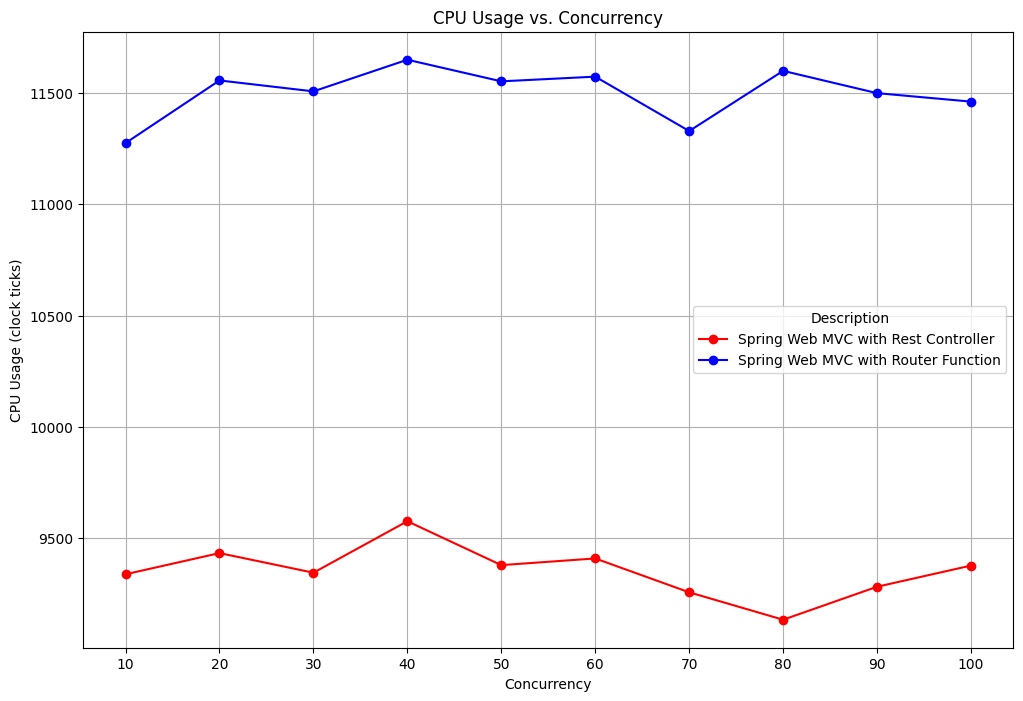

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'results/results_2024-07-09_23:50:00_rest_controller_vs_router_function.log'
df = pd.read_csv(file_path)

df['total_cpu'] = df['user_cpu'] + df['kern_cpu']

df_filtered = df[df['description'].isin(
    [
     'Spring Web MVC with Rest Controller',
     'Spring Web MVC with Router Function'
     ])][['description', 'concurrency', 'total_cpu']]

# grouped_data.to_csv('test-output.csv', index=False)


grouped_data = df_filtered.groupby(['description', 'concurrency'])['total_cpu'].mean().reset_index()


# Plot setup
plt.figure(figsize=(12, 8))

# Colors for each description
colors = {
    'Spring Web MVC with Rest Controller': 'red',
    'Spring Web MVC with Router Function': 'blue'
}

# Plot each group
for description, color in colors.items():
    subset = grouped_data[grouped_data['description'] == description]
    plt.plot(subset['concurrency'], subset['total_cpu'], marker='o', label=description, color=color)

# Customize the plot
plt.title('CPU Usage vs. Concurrency')
plt.xlabel('Concurrency')
plt.ylabel('CPU Usage (clock ticks)')
plt.legend(title='Description')
plt.xticks([10,20,30,40,50,60,70,80,90,100])
plt.grid(True)

# Show the plot
plt.show()